## Name:- Rohan Suvarna

## Domain:- Business Analyst

## Bharat Intern

## Task :- Forecasting the sales of a supermarket 

#### Importing Libraries

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import statsmodels.api as sm
from scipy.stats import skew

#### Load data

In [4]:
df = pd.read_csv(r'C:\Users\ROHAN SUVARNA\OneDrive\Documents\Rohan Suvarna\Projects\Business_Analyst\train.csv',encoding = 'unicode_escape')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [5]:
#### head

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
### Tail

In [8]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [10]:
df.shape

(9800, 18)

In [11]:
## information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [12]:
## null value contain

df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [23]:
## Postal code contain null values = 11
## Delete

df.dropna(inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float

In [26]:
df.shape

(9789, 18)

In [27]:
## Descibe
df.describe()

,Row ID,Postal Code,Sales
count,9789.000000,9789.000000,9789.000000
mean,4896.705588,55273.322403,230.116193
std,2827.486899,32041.223413,625.302079
min,1.000000,1040.000000,0.444000
25%,2449.000000,23223.000000,17.248000
50%,4896.000000,58103.000000,54.384000
75%,7344.000000,90008.000000,210.392000
max,9800.000000,99301.000000,22638.480000


### Exploratory Data analysis

#### Highest product sales according to region

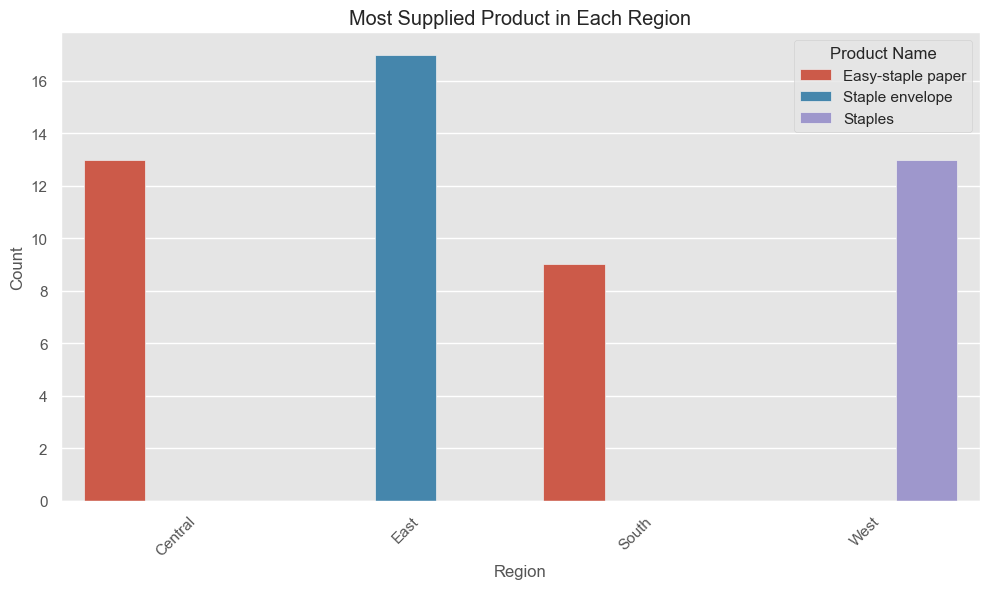

In [160]:
# Group the data by 'Region' and 'Product Name' and calculate the counts
product_counts = df.groupby(['Region', 'Product Name']).size().reset_index(name='Count')

# Find the product that supplies the most in each region
idx = product_counts.groupby('Region')['Count'].idxmax()
most_supplied_products = product_counts.loc[idx]

# Create a bar plot using seaborn to visualize the most supplied products in each region
plt.figure(figsize=(10, 6))
sns.barplot(data=most_supplied_products, x='Region', y='Count', hue='Product Name')
plt.title('Most Supplied Product in Each Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Product Name', title_fontsize='large')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### here we can tell that East region consider most supply of product Staple envelope

### Which product has maximum sold

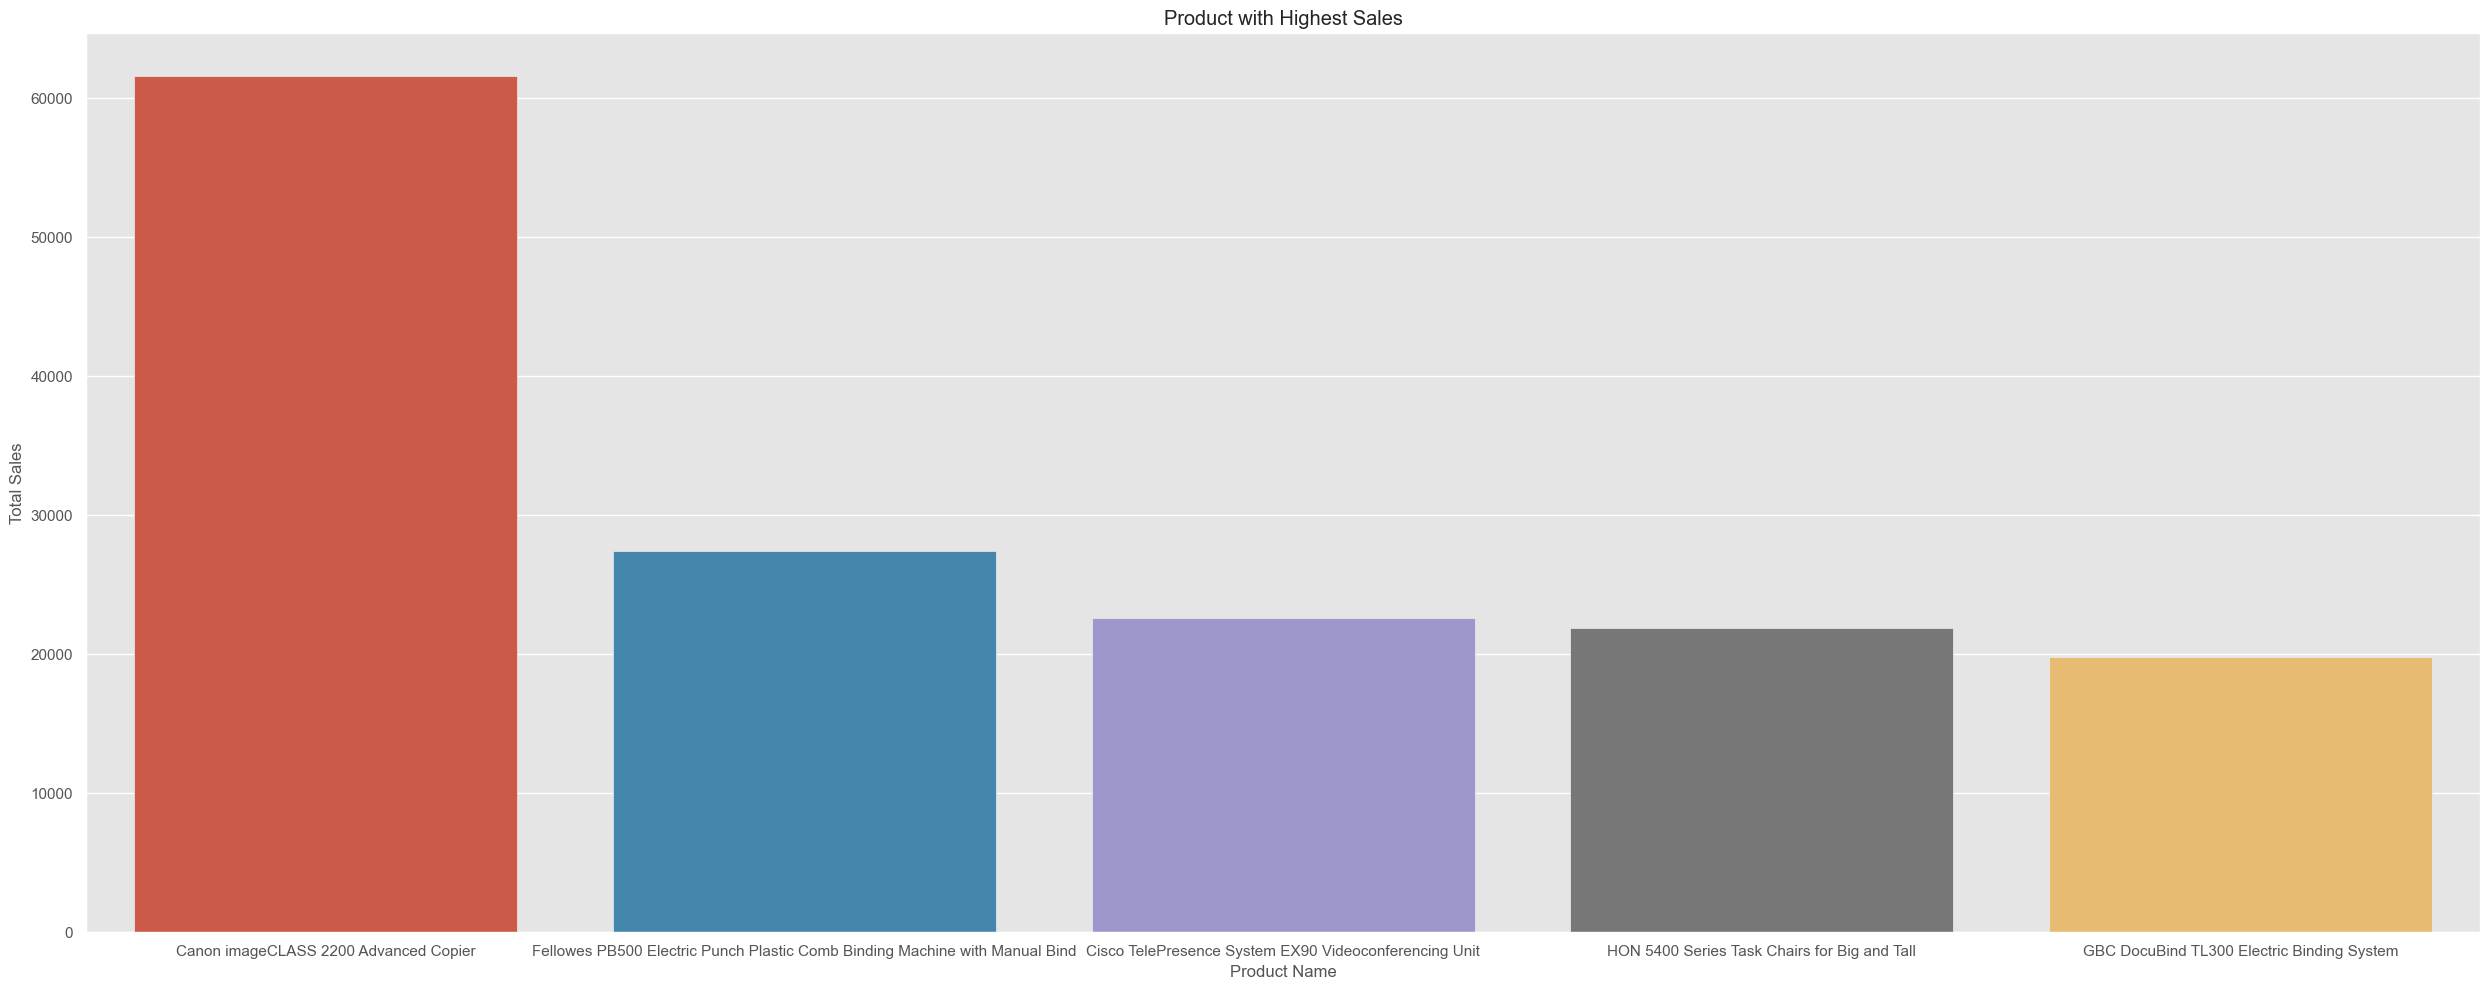

In [129]:
# Group the data by 'Product Name' and calculate the total sales for each product
s = df.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by = 'Sales',ascending = False).head(5)

# Find the highest product sales
highest_product_sold = s.loc[s['Sales'].idxmax()]

## Using barplot to visualize the highest sales
plt.figure(figsize=(25,10))
sns.barplot(x='Product Name', y='Sales', data=s)
plt.title('Product with Highest Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

#### Closely we can see thet Canon image CLASS 2200 Advanced copier has highest sales 

### Which product has minimum sold

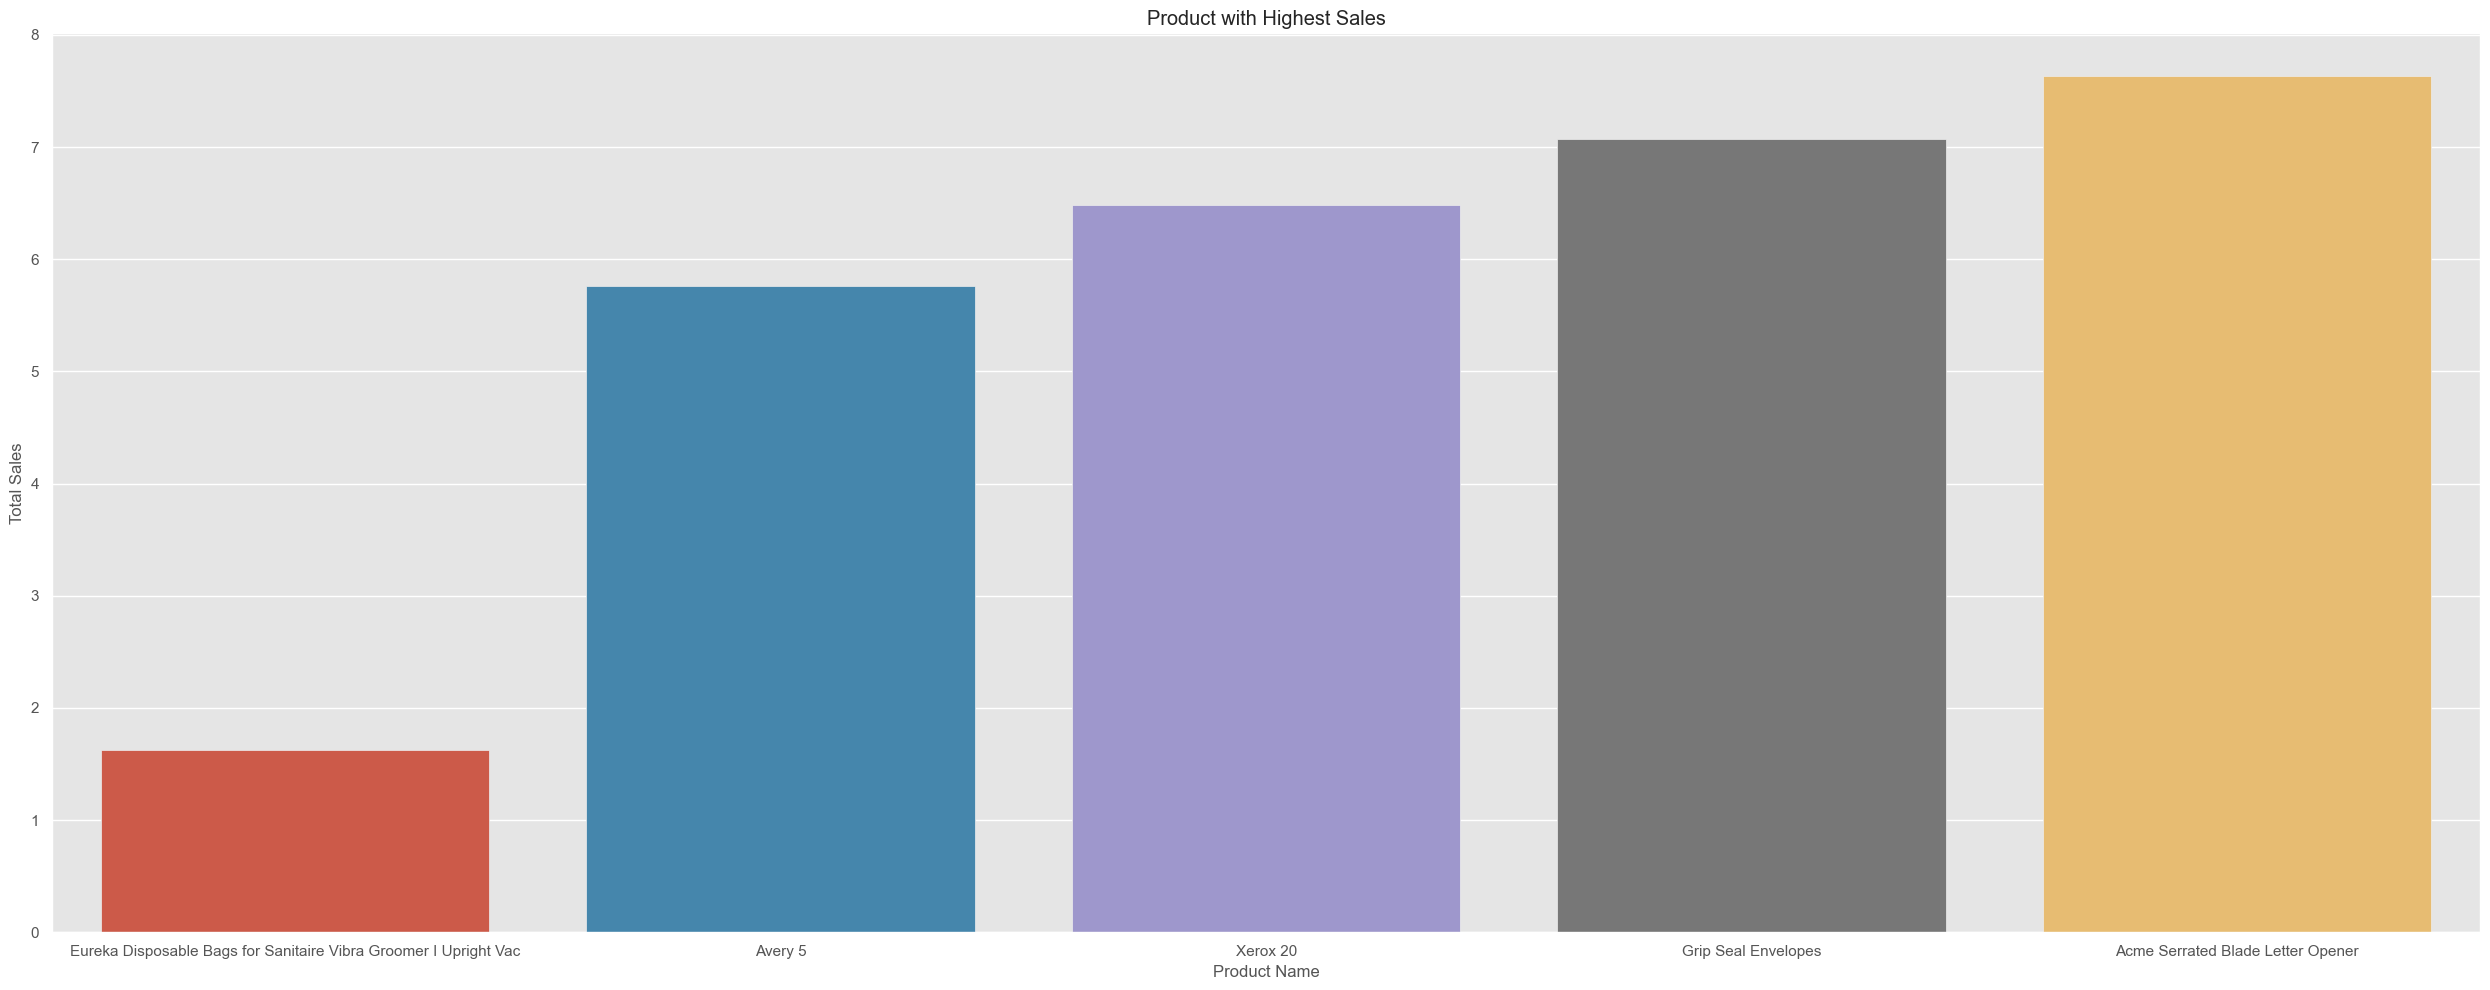

In [144]:
# Group the data by 'Product Name' and calculate the total sales for each product
s = df.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by = 'Sales',ascending = True).head(5)

# Find the highest product sales
Lowest_product_sold = s.loc[s['Sales'].idxmin()]

## Using barplot to visualize the highest sales
plt.figure(figsize=(25,10))
sns.barplot(x='Product Name', y='Sales', data=s)
plt.title('Product with Highest Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

#### We can see that Eureka Disposable bags for sanitaire Vibra Groomer | Upright Vac has less sales

### Visualize sales distribution

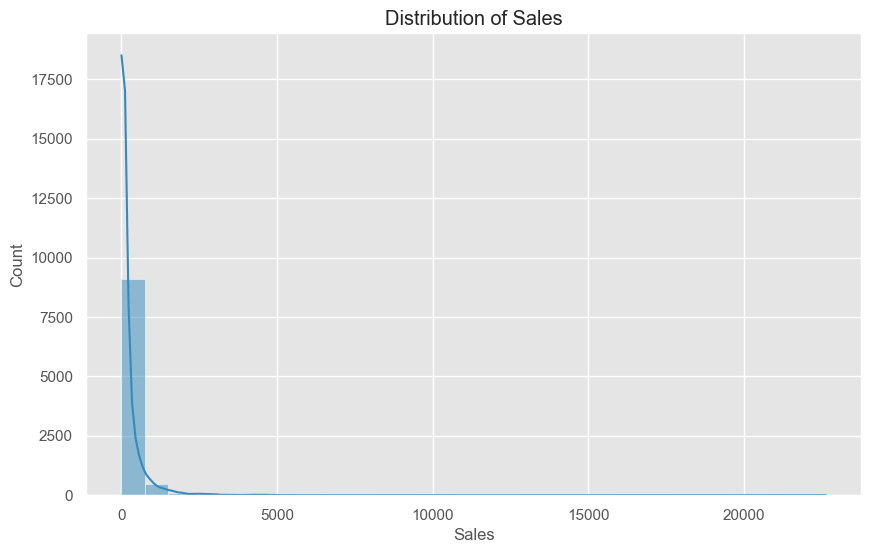

In [155]:
# Visualize sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.show()

### Sales by Region

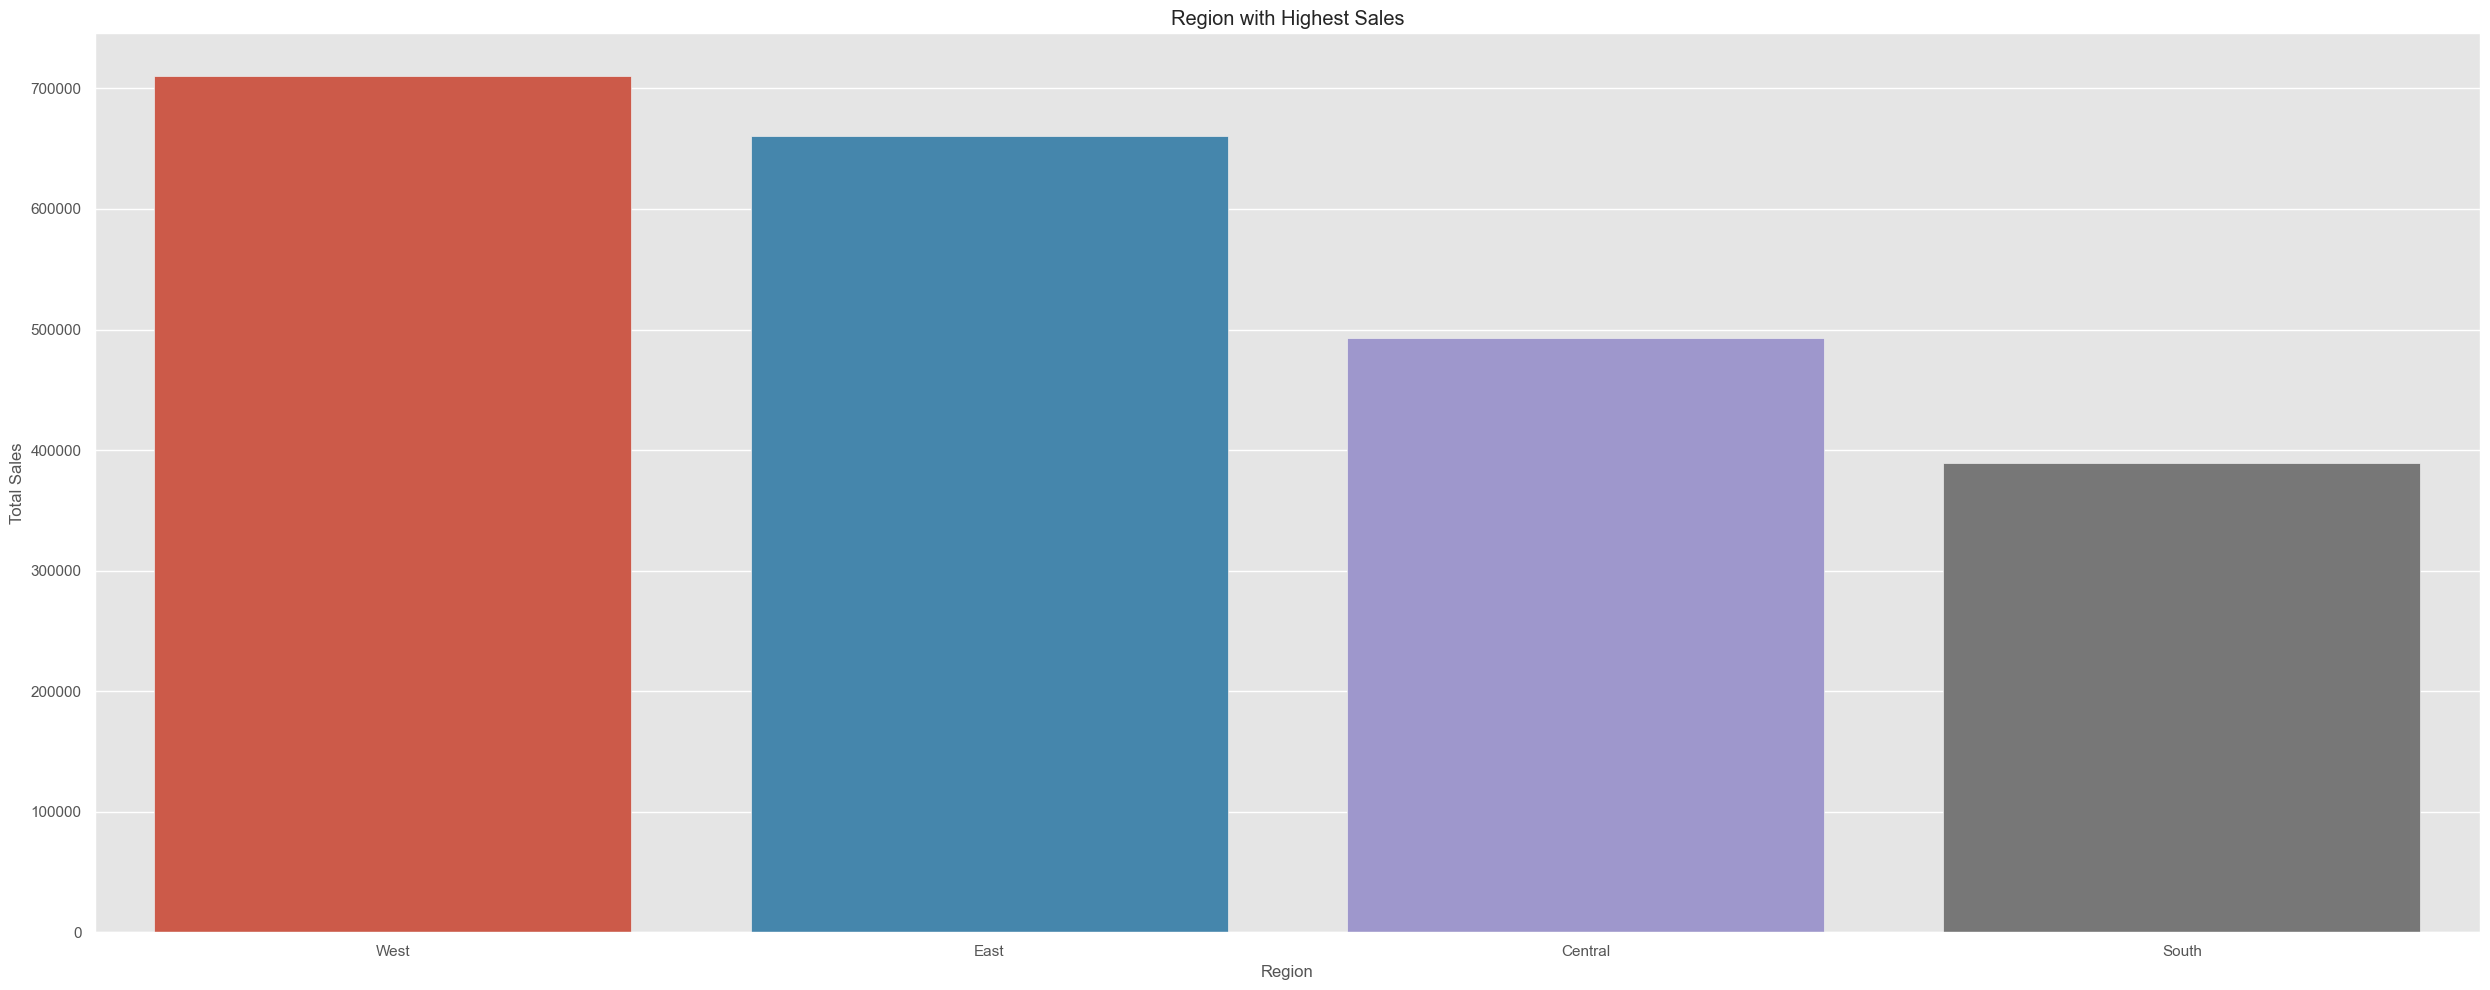

In [143]:
# Group the data by 'Region' and calculate the total sales 
s = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by = 'Sales',ascending = False)

# Find the highest product sales
highest_Region_sales = s.loc[s['Sales'].idxmax()]

## Using barplot to visualize the highest sales
plt.figure(figsize=(25,10))
sns.barplot(x='Region', y='Sales', data=s)
plt.title('Region with Highest Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

West region contain highest sales 

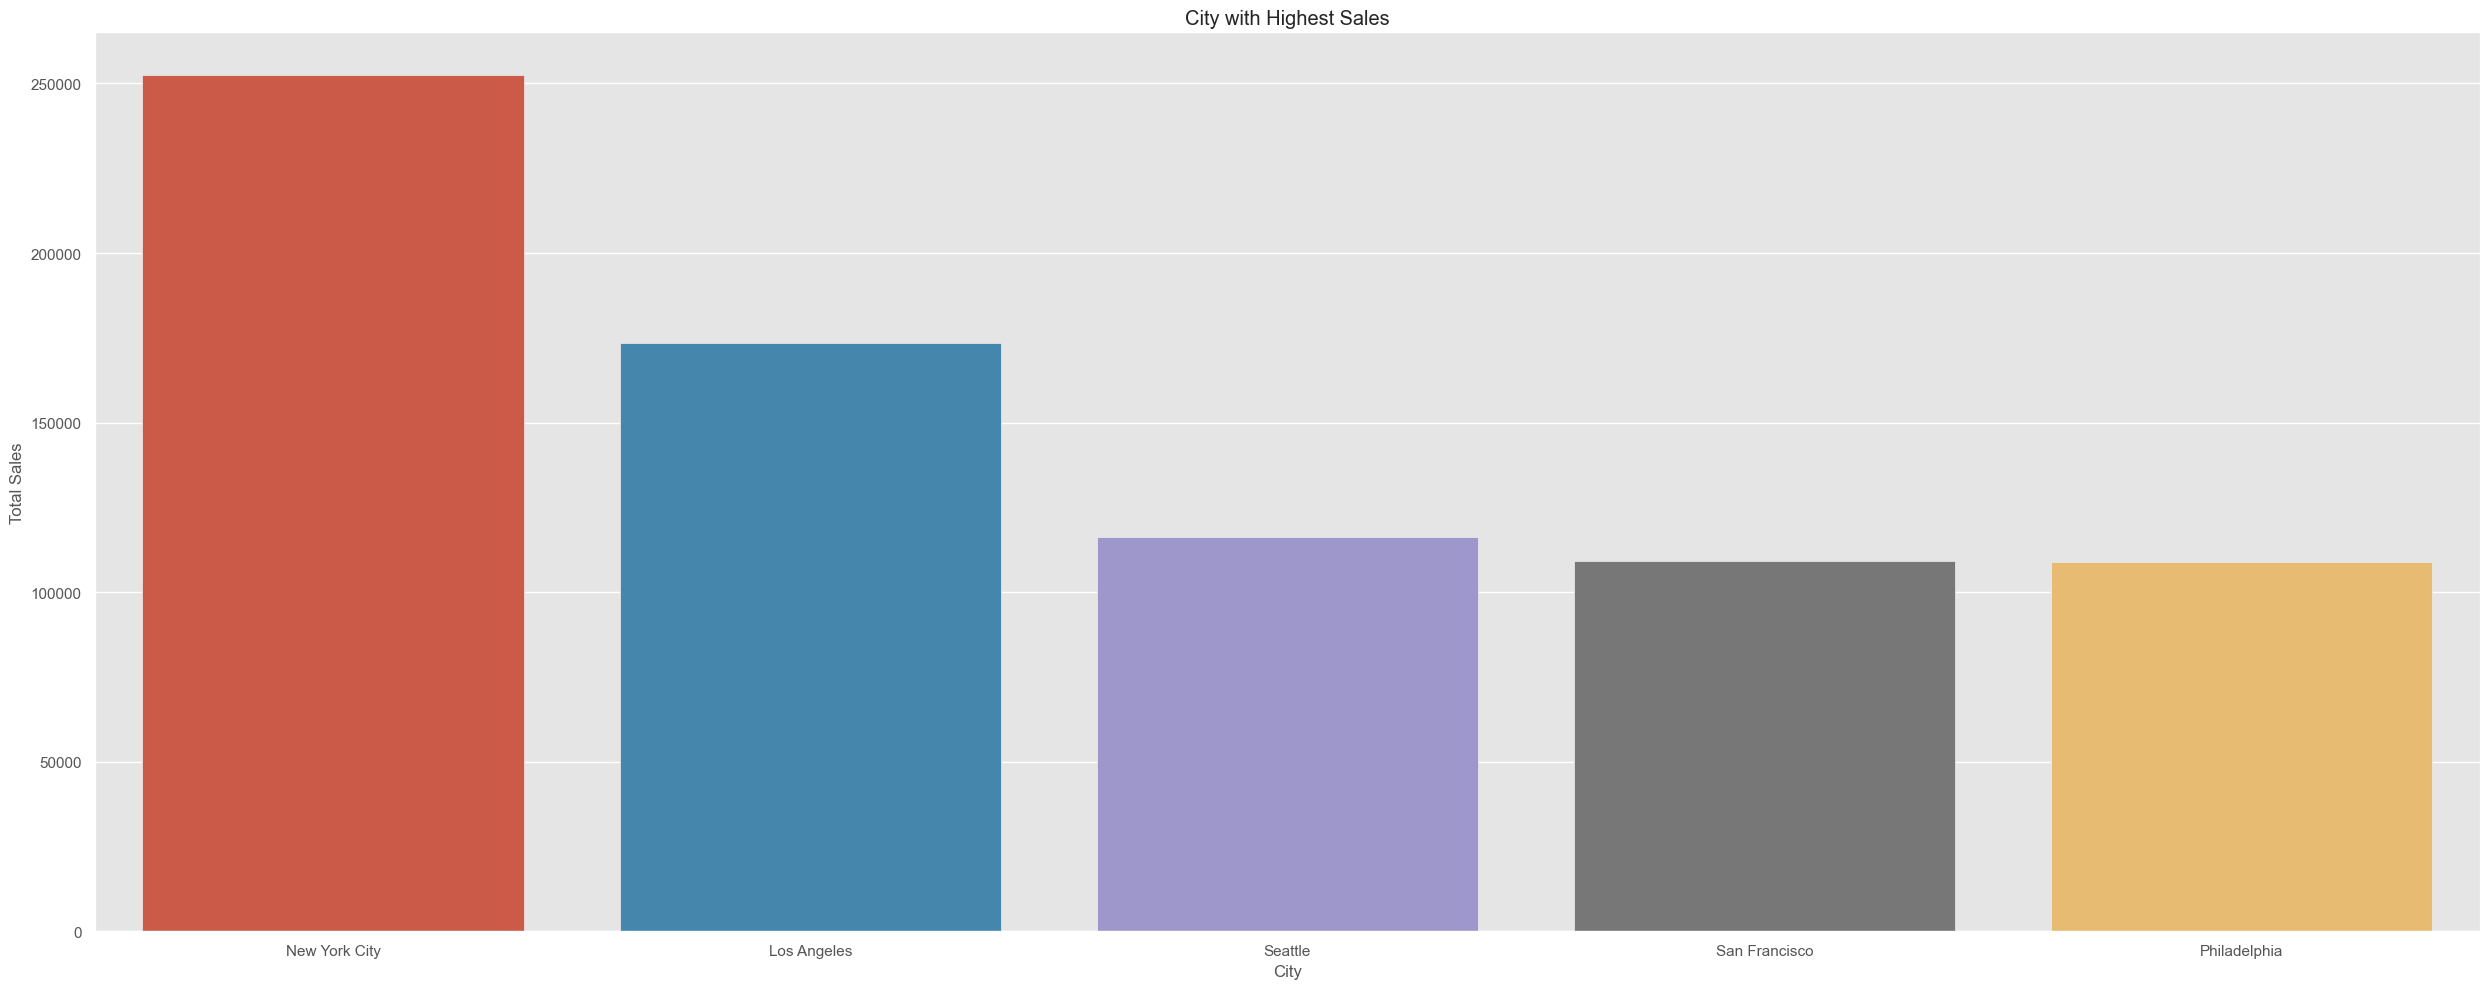

In [145]:
# Group the data by 'City' and calculate the total sales 
s = df.groupby('City')['Sales'].sum().reset_index().sort_values(by = 'Sales',ascending = False).head(5)

# Find the highest product sales
highest_City_sales = s.loc[s['Sales'].idxmax()]

## Using barplot to visualize the highest sales
plt.figure(figsize=(25,10))
sns.barplot(x='City', y='Sales', data=s)
plt.title('City with Highest Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

New york city has highest sales

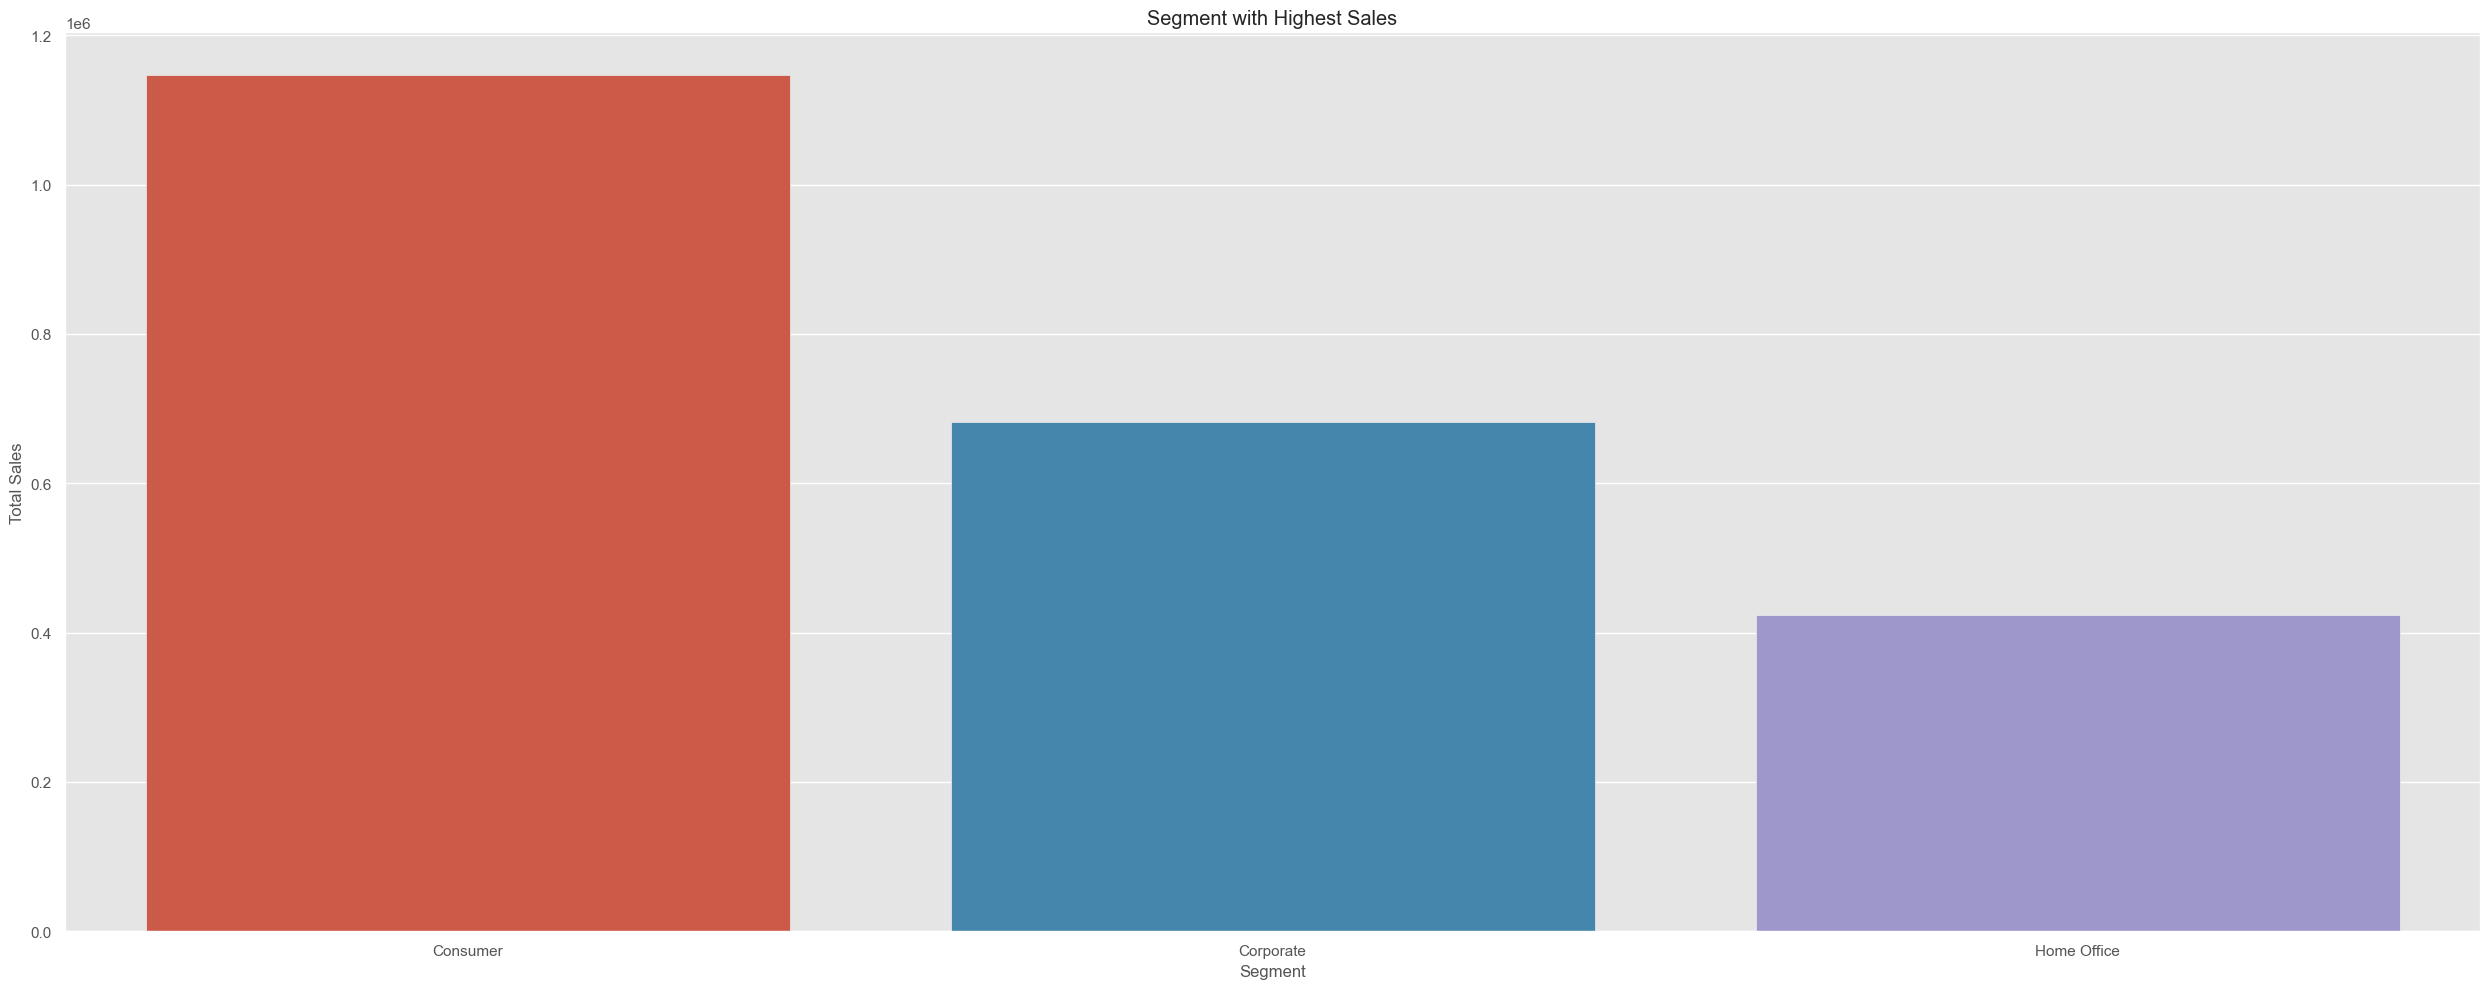

In [146]:
# Group the data by 'Segment' and calculate the total sales 
s = df.groupby('Segment')['Sales'].sum().reset_index().sort_values(by = 'Sales',ascending = False).head(5)

# Find the highest Segment sales
highest_Segment_sales = s.loc[s['Sales'].idxmax()]

## Using barplot to visualize the highest sales
plt.figure(figsize=(25,10))
sns.barplot(x='Segment', y='Sales', data=s)
plt.title('Segment with Highest Sales')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

Highest sales made by consumer as compared to others House office and Corporate segment.

In [100]:
df.corr()

,Row ID,Postal Code,Sales
Row ID,1.000000,0.013645,-0.000434
Postal Code,0.013645,1.000000,-0.024067
Sales,-0.000434,-0.024067,1.000000


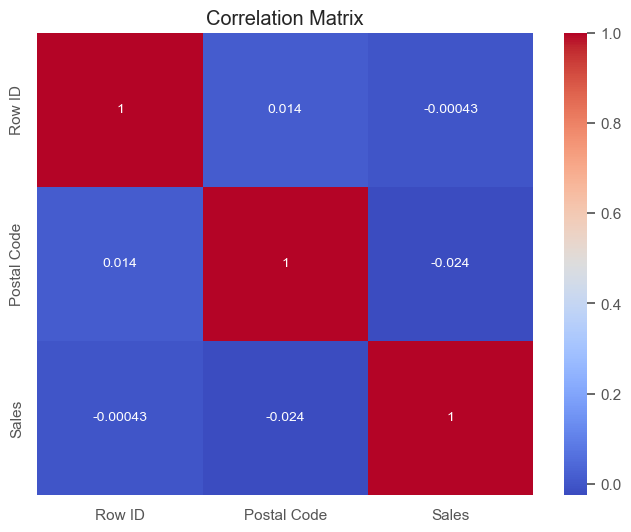

In [101]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [116]:
skewness_sales = df['Sales'].skew()
print("Skewness of Sales:", skewness_sales)

Skewness of Sales: 13.053630955201138


- when value is not symmetric is called skeweed
- here sales is highly Skeweed

# Conclusion

##### Highest Stock to keep

In [ ]:
- East Region has highest supply of product Staple envelope so we have to stock it up.
- Canon image CLASS 2200 Advanced copier product.

##### Lowest Stock to keep

In [ ]:
- Eureka Disposable bags for sanitaire Vibra Groomer | Upright Vac porduct
- south region has less supply of Easy-staple paper

##### Highest Sales

In [ ]:
- West region contain highest sales 
- New york city has highest sales
- consumer segment

##### Lowest sales

In [ ]:
- East Saple Paper less sales in South region
- Hoouse office